In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

#### Create a nice looking graph of the political blog network

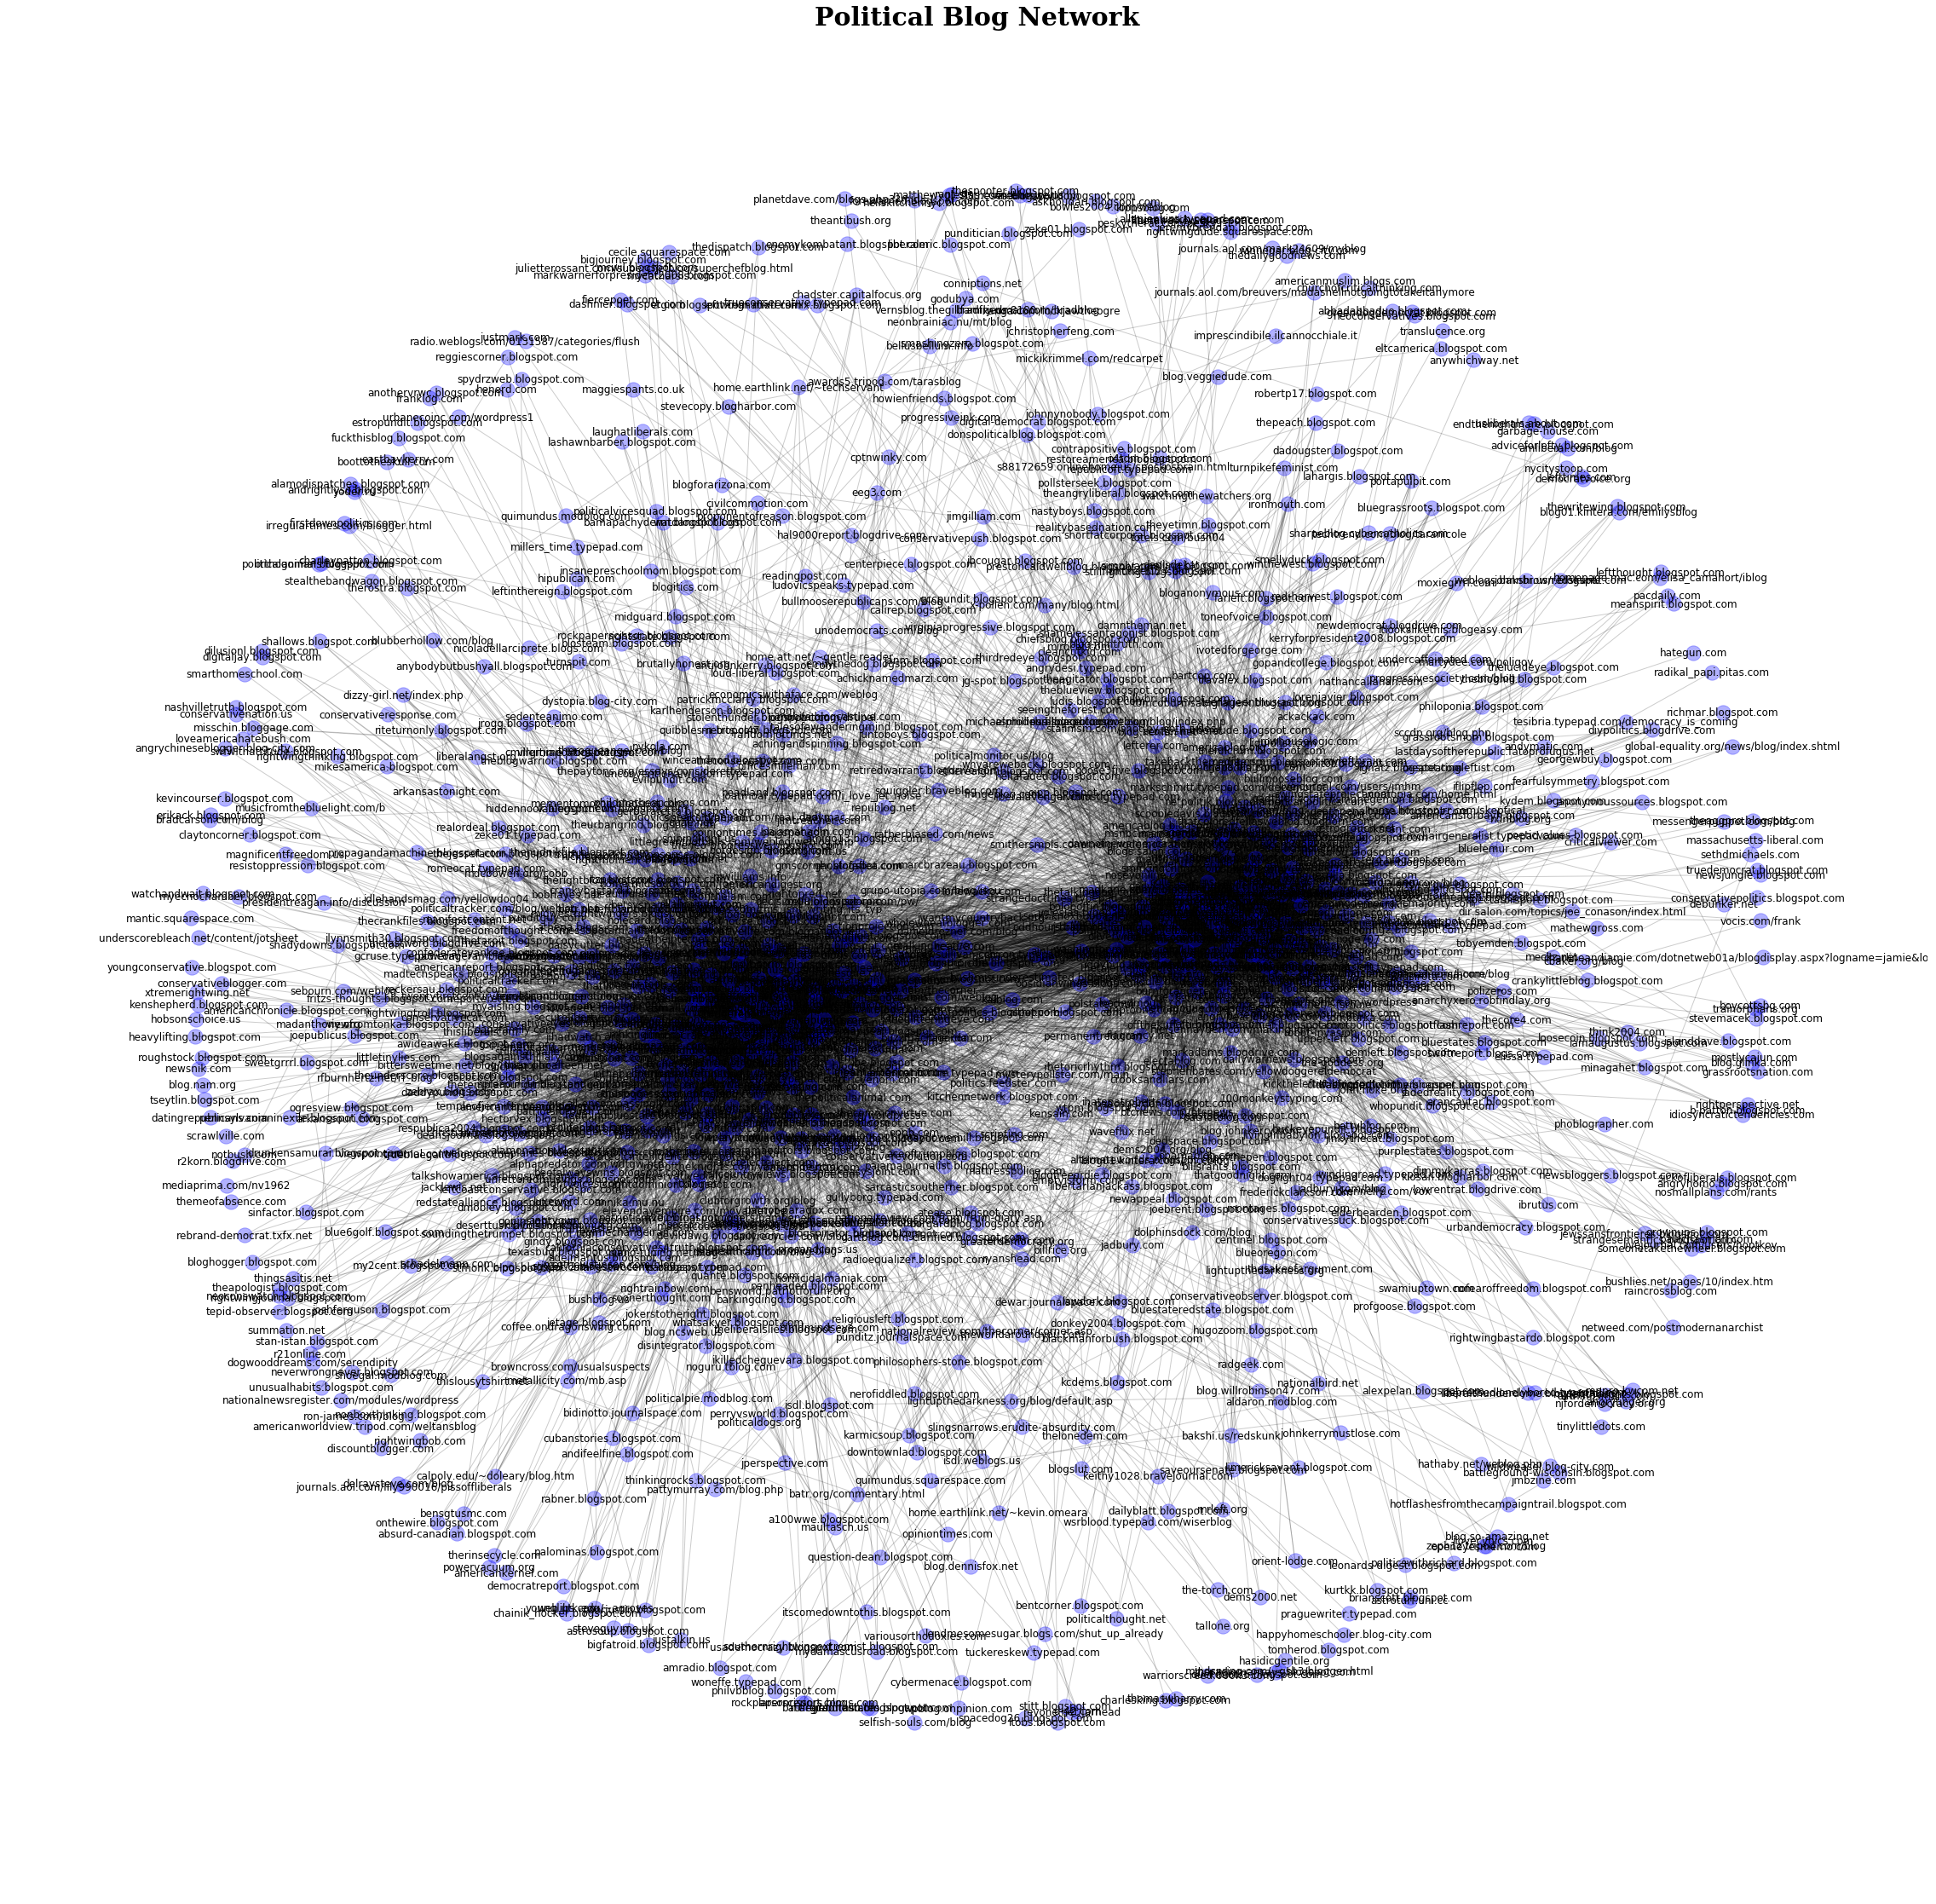

In [4]:
plt.figure(figsize=(40,40))
pos = nx.spring_layout(G, iterations=500, scale=3, k=3)
nx.draw_networkx_labels(G, pos, fontsize=3)
font = {'fontname': 'Serif',
        'color': 'k',
        'fontweight': 'bold',
        'fontsize': 30
        }
plt.title('Political Blog Network', font)
nx.draw_networkx_nodes(G, pos, node_color='b', alpha=0.3)
nx.draw_networkx_edges(G, pos, alpha=0.2, node_size=0, width=1, edge_color='k')
plt.axis('off')
plt.show()

In [5]:
centrality = nx.eigenvector_centrality(G)

In [6]:
person_list = []
for node in centrality:
    person_list.append((node, centrality[node]))

#### What are the 10 most influential blogs?

In [7]:
top_10 = sorted(person_list, key=lambda x:x[1], reverse=True)
top_10[:10]

[('atrios.blogspot.com', 0.19480797936637684),
 ('dailykos.com', 0.1608974020523482),
 ('washingtonmonthly.com', 0.14653924259836862),
 ('digbysblog.blogspot.com', 0.1426436922171831),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546019)]

#### What are the 10 least influential blogs?

In [8]:
bottom_10 = sorted(person_list, key=lambda x:x[1], reverse=False)
bottom_10[:10]

[('digital-democrat.blogspot.com', 1.7763251097559653e-72),
 ('thelonedem.com', 1.7763251097559653e-72),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('quimundus.modblog.com', 6.682929975006485e-08),
 ('batr.org/commentary.html', 6.795517611554003e-07),
 ('batr.net', 6.796325594929456e-07),
 ('democratvoice.org', 1.0233388204113296e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('massachusetts-liberal.com', 9.4833652357345e-06),
 ('thingsasitis.net', 1.1736249650658601e-05)]

#### Answer this question for both left wing and right wing blogs seperately

In [9]:
GL = nx.Graph()
GR = nx.Graph()
node = M.nodes(data=True)
for i in range(0, M.number_of_nodes()):
    if node[i][1]['value'] == 1:
        GR.add_node(node[i][0])
    else:
        GL.add_node(node[i][0])

In [10]:
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v):
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u,v,weight=1)
    else:
        continue

In [11]:
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v):
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u,v,weight=1)
    else:
        continue

In [12]:
left_centrality = nx.eigenvector_centrality(GL)
right_centrality = nx.eigenvector_centrality(GR)

In [13]:
left_list = []
for node in left_centrality:
    left_list.append((node, left_centrality[node]))

In [14]:
right_list = []
for node in right_centrality:
    right_list.append((node, right_centrality[node]))

#### What are the 10 most influential blogs in the Left Wing?

In [15]:
left_top_10 = sorted(left_list, key=lambda x:x[1], reverse=True)
left_top_10[:10]

[('atrios.blogspot.com', 0.20960069262288036),
 ('dailykos.com', 0.16836966726258346),
 ('bodyandsoul.typepad.com', 0.15679455118140725),
 ('liberaloasis.com', 0.1561166968929224),
 ('digbysblog.blogspot.com', 0.1554364168957962),
 ('tbogg.blogspot.com', 0.1501036544219527),
 ('corrente.blogspot.com', 0.14485933101755416),
 ('washingtonmonthly.com', 0.13968149417405418),
 ('dneiwert.blogspot.com', 0.13474938566339847),
 ('pandagon.net', 0.13295188387217455)]

#### What are the 10 least influential blogs in the Left Wing?

In [16]:
left_bottom_10 = sorted(left_list, key=lambda x:x[1], reverse=False)
left_bottom_10[:10]

[('adamtalib.blogspot.com', 0.0),
 ('digitaljay.blogspot.com', 0.0),
 ('elderbearden.blogspot.com', 0.0),
 ('estropundit.blogspot.com', 0.0),
 ('forewarned.blogspot.com', 0.0),
 ('fuckthisblog.blogspot.com', 0.0),
 ('ilovecynics.com', 0.0),
 ('julietterossant.com/superchefblog/superchefblog.html', 0.0),
 ('justmark.com', 0.0),
 ('nycitystoop.com', 0.0)]

#### What are the 10 most influential blogs in the Right Wing?

In [17]:
right_top_10 = sorted(right_list, key=lambda x:x[1], reverse=True)
right_top_10[:10]

[('instapundit.com', 0.21139123782218386),
 ('blogsforbush.com', 0.20315985849713222),
 ('hughhewitt.com', 0.1709179903989045),
 ('lashawnbarber.com', 0.15887443333047244),
 ('michellemalkin.com', 0.14740693235832475),
 ('powerlineblog.com', 0.14623996410167717),
 ('wizbangblog.com', 0.14567416434521394),
 ('littlegreenfootballs.com/weblog', 0.13915289252981472),
 ('vodkapundit.com', 0.1368129704517017),
 ('outsidethebeltway.com', 0.122583745283152)]

#### What are the 10 least influential blogs in the Right Wing?

In [18]:
right_bottom_10 = sorted(right_list, key=lambda x:x[1], reverse=False)
right_bottom_10[:10]

[('kenshepherd.blogspot.com', 0.0),
 ('swiftreport.blogs.com', 0.0),
 ('larsonreport.com', 0.0),
 ('windingroad.typepad.com', 0.0),
 ('perryvsworld.blogspot.com', 0.0),
 ('politicalanimals.blogspot.com', 0.0),
 ('newsjungle.blogspot.com', 0.0),
 ('revone.net/jarhead', 0.0),
 ('84rules.blog-city.com', 0.0),
 ('adonai.cc', 0.0)]